In [1]:
from fxns.fill_ps import *
from fxns.sad_sampler import *

import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import default_rng

In [2]:
s= 5
n= 30
nsamples = 50000

samples = sample_fs(s, n, nsamples)

samples_tally = tally_sets(samples)

## Set frequency

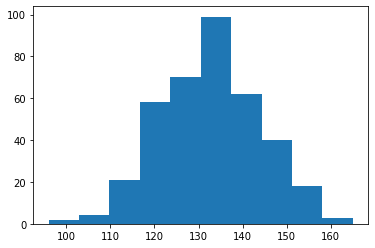

In [3]:
fig, ax = plt.subplots()

ax.hist(samples_tally["frequency"])

plt.show()


In [4]:
unique_samples = samples_tally.shape[0]
unique_samples

377

In [5]:
nsamples/unique_samples

132.6259946949602

In [6]:
samples_tally

,0,1,2,3,4,frequency
0,1,1,1,1,26,149
1,1,1,1,2,25,121
2,1,1,1,3,24,139
3,1,1,1,4,23,136
4,1,1,1,5,22,127
...,...,...,...,...,...,...
372,5,5,5,7,8,133
373,5,5,6,6,8,127
374,5,5,6,7,7,125
375,5,6,6,6,7,145


### Compare distribution of set frequency to draws from a uniform distribution

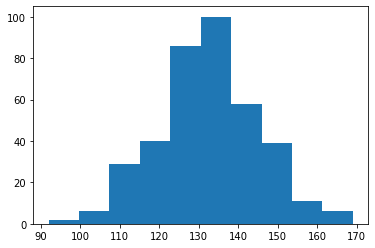

In [7]:
rng = default_rng()
vals = rng.integers(unique_samples, size = nsamples)

v, freq = np.unique(vals, return_counts = True, axis  = 0)

uniform_df = pd.DataFrame(v)

uniform_df["frequency"] = freq

fig, ax = plt.subplots()

ax.hist(uniform_df["frequency"])

plt.show()


## Plotted RADs

In [ ]:
samples_long = samples_tally.drop(columns = ['frequency'])
samples_long["sample"] = range(samples_long.shape[0])
samples_long = samples_long.melt(id_vars = 'sample', var_name = 'rank', value_name = 'abundance')
samples_long

In [ ]:
import seaborn as sns
g = sns.relplot(x="rank", y="abundance", hue = "sample", kind="line", data=samples_long)
g